<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/TensorFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [2]:
# load the dataset
(X_train, y_train), (X_test, y_test) = \
    keras.datasets.fashion_mnist.load_data()

29515/29515 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
26421880/26421880 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
5148/5148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
4422102/4422102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


**cf. Dataset in TensorFlow, PyTorch**  
**Dataset**Ïù¥ÎûÄ X(features)ÏôÄ y(label)Ïù¥ Ìï®Íªò Ìè¨Ìï®Îêú ÌòïÌÉúÎ•º ÏùòÎØ∏ÌïúÎã§.  
(ÏúÑ cell)Îî∞ÎùºÏÑú (X_train, y_train)Í≥º Í∞ôÏù¥ ÏßÄÏ†ïÌïòÎ©¥ ÏïåÏïÑÏÑú X_trainÏóêÎäî XÍ∞Ä, y_trainÏóêÎäî yÍ∞Ä Î≥¥Í¥ÄÎêúÎã§.

**cf. `\`Ïùò ÏÇ¨Ïö©**  
References. [PEP 8 - Style Guide for Python Code](https://peps.python.org/pep-0008/)  

The Python standard library is conservative and requires **limiting lines to 79 characters** (and docstrings/comments to 72).  
**Backslashes(\\)** may still be appropriate at times. For example, long, multiple with-statements could not use implicit continuation before Python 3.10, so backslashes were acceptable for that case:  
```python
with open('/path/to/some/file/you/want/to/read') as file_1, \
     open('/path/to/some/file/being/written', 'w') as file_2:
    file_2.write(file_1.read())
```

In [3]:
# check the shape and type of X, y
print(f'X_train: Shape {X_train.shape} Type {type(X_train)}, y_train: Shape {y_train.shape} Type {type(y_train)}')
print(f'X_test: Shape {X_test.shape} Type {type(X_test)}, y_test: Shape {y_test.shape} Type {type(y_test)}')

X_train: Shape (60000, 28, 28) Type <class 'numpy.ndarray'>, y_train: Shape (60000,) Type <class 'numpy.ndarray'>
X_test: Shape (10000, 28, 28) Type <class 'numpy.ndarray'>, y_test: Shape (10000,) Type <class 'numpy.ndarray'>


In [4]:
# ÎßåÏïΩ sample ÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÍ≥†, yÍ∞Ä continuous valueÎùºÎ©¥,
# np.unique()Ïóê Î¶¨ÏÜåÏä§ ÏÜåÎ™®Í∞Ä ÌÅ¥ Ïàò ÏûàÏúºÎØÄÎ°ú Î®ºÏ†Ä 5Í∞úÎßå Ï∂úÎ†•
print(y_train[:5]) # Output: [9 0 0 3 0]
# yÍ∞Ä dicreteÏù∏ Í≤ÉÏùÑ ÌôïÏù∏ ÌõÑÏóê np.unique() Î¶¨ÌÑ¥
print(np.unique(y_train)) # Output: [0 1 2 3 4 5 6 7 8 9]

[9 0 0 3 0]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# check the labels count
from collections import Counter

# label_counter: Counter({9: 6000, 0: 6000, ..., 4: 6000, 8: 6000}) NO SORTED
label_counter = Counter(y_train)

# x[0]ÏùÄ Key Í∏∞Ï§Ä, x[1]ÏùÄ Value Í∏∞Ï§Ä Ï†ïÎ†¨
# reverse=FalseÏù¥Î©¥ ascending, reverse=TrueÏù¥Î©¥ descending
print(sorted(label_counter.items(), key=lambda x: x[0], reverse=False))

[(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]


In [6]:
# Logistic Regression

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

X_train_scaled = (X_train / 255.0).reshape(-1, 28*28)

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(estimator=sc,
                        X=X_train_scaled, y=y_train,
                        return_train_score=True,
                        n_jobs=-1)

train_score = np.mean(scores['train_score'])
test_score = np.mean(scores['test_score'])
print(f'train_score: {train_score}, test_score: {test_score}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


train_score: 0.8308250000000001, test_score: 0.8196000000000001


In [7]:
# cf. Ïª¥Ìì®ÌÑ∞Îäî 28pixel * 28pixelÏùÑ Í∑∏Î¶ºÏúºÎ°ú Ïù¥Ìï¥ÌïòÏßÄ Î™ªÌïúÎã§
# Îî∞ÎùºÏÑú .reshape(-1, 28*28)ÏùÑ ÌÜµÌï¥ÏÑú 784pixelÏùò 1-dimÏúºÎ°ú ÎßåÎì†Îã§
# Îî∞ÎùºÏÑú 60,000Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎäî Í∞ÅÍ∞Å 784Í∞úÏùò x_jÍ∞íÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ Ïù∏Ïä§ÌÑ¥Ïä§Ïù¥Îã§
X_train_scaled.shape

(60000, 784)

**cf. ÏúÑ cell Ïù¥Ïñ¥ÏÑú**  
input: $x^i_j$Ïóê ÎåÄÌï¥ÏÑú $i = 0, 1, ..., 59999$ Í∑∏Î¶¨Í≥† $j = 0, 1, ..., 783$  
output: $z_k$Ïóê ÎåÄÌï¥ÏÑú $k = 0, 1, ..., 9$  

$x^i$Ïóê ÎåÄÌïú $z_k = \Sigma^{783}_{i=0}{(w_{ki}*x_{i})} + b_k$Ïù¥Îã§.  
* ÎèôÏùºÌïú $x_i$Ïóê ÎåÄÌïú weightÎùºÍ≥† ÌïòÎçîÎùºÎèÑ, $z_k$Ïóê Îî∞Îùº weightÍ∞íÏù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê $w_{ki}$ÎùºÍ≥† ÌëúÌòÑÌï®.
* ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú biasÍ∞íÎèÑ $z_k$Ïóê Îã¨ÎùºÏßÄÎØÄÎ°ú $b_k$ÎùºÍ≥† ÌëúÌòÑÌï®.

$z_k$ ÏûêÏ≤¥Îäî continuousÏù¥Î©∞, Ïù¥Î•º $softmax$ functionÏóê ÌÜµÍ≥ºÏãúÌÇ® Í∞íÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.  
* $0<=softmax(z_k)<=1$ Í∑∏Î¶¨Í≥† $\Sigma{softmax(z_k)}=1$

* Ï¶â Í∞Å classÏóê ÏÜçÌï† ÌôïÎ•†Ïù¥ ÎêúÎã§.

Ï¶â Input NodeÎäî 784Í∞úÏù¥Í≥†, Output NodeÎäî 10Í∞úÏûÑ. Ïù¥ Í≥ºÏ†ïÏùÑ (X_train_scaled 60,000Í∞ú Í∏∞Ï§Ä) 60,000Î≤à ÏàòÌñâÌïòÎäî Í≤ÉÏûÑ.

* * *
Deep Learning Î∂ÑÏïºÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ï∂©Î∂ÑÌûà ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê validation scoreÍ∞Ä ÏïàÏ†ïÏ†ÅÏù¥Í≥†, cross-validateÎ•º ÌïòÍ∏∞ÏóêÎäî ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¨Í∏∞ ÎïåÎ¨∏Ïóê 1Í∞úÏùò validation setÏúºÎ°úÎßå Í≤ÄÏ¶ùÌïúÎã§.

In [8]:
# Split train set into train set and validate set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled,
                                                  y_train,
                                                  test_size=0.2,
                                                  stratify=y_train,
                                                  random_state=42)

print(f'X_train: Shape {X_train.shape} Type {type(X_train)}, y_train: Shape {y_train.shape} Type {type(y_train)}')
print(f'X_val: Shape {X_val.shape} Type {type(X_val)}, y_val: Shape {y_val.shape} Type {type(y_val)}')

X_train: Shape (48000, 784) Type <class 'numpy.ndarray'>, y_train: Shape (48000,) Type <class 'numpy.ndarray'>
X_val: Shape (12000, 784) Type <class 'numpy.ndarray'>, y_val: Shape (12000,) Type <class 'numpy.ndarray'>


In [9]:
# Create the Dense layer
dense = keras.layers.Dense(units=10, # Îã§Ïùå neuron(node) Ïàò
                           activation='softmax',
                           input_shape=(784,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**cf. `keras.layers.Dense()`**  
References. [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)  

* **units**: Positive integer, dimensionality of the output space.
    - input layer - output layer Î∞îÎ°ú Ïó∞Í≤∞ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Îã§Ïùå nodeÏùò ÏàòÎäî 10Í∞ú(label Ï¢ÖÎ•ò)
* **activation**: Activation function to use. If you don't specify anything, no activation is applied (i.e. a(x) = x)

In [10]:
# Create the Model
model1 = keras.models.Sequential()
model1.add(dense)

model1.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                        ‚îÇ (None, 10)                  ‚îÇ           7,850 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

**cf. `model.summary()` Í≤∞Í≥º Ìï¥ÏÑù**  

**Output Shape**  
* (Batch_size, \*Output_Dimensions)
* Î≥∏ ÏòàÏ†úÏóêÏÑúÎäî Batch_size ÏóÜÏúºÎØÄÎ°ú `None`

**Total params**  
* Ìï¥Îãπ layerÎ•º ÌÜµÍ≥ºÌïòÎäî parameter Ïàò
* Í∞Å data instanceÎäî 784(=28*28) Í∞úÏùò $x_j$Î•º Í∞ÄÏßÄÍ≥† ÏûàÏúºÎØÄÎ°ú, $w_j$ ÎòêÌïú Ïù¥Ïóê ÎåÄÏùëÌïòÏó¨ 784Í∞úÍ∞Ä Ï°¥Ïû¨Ìï®.
* bias 1Í∞úÎ•º Ï∂îÍ∞ÄÌïòÎ©¥ 785Í∞úÏûÑ.
* Ïù¥Îïå layerÏôÄ Ïó∞Í≤∞Îêú output nodeÍ∞Ä 10Í∞úÏù¥ÎØÄÎ°ú, 785 * 10 = 7,850ÏûÑ.

**Trainable params**  
* Îßê Í∑∏ÎåÄÎ°ú, ÌïôÏäµ Í∞ÄÎä•Ìïú(= ÏóÖÎç∞Ïù¥Ìä∏ Í∞ÄÎä•Ìïú) parameters
* ÌëúÏóêÏÑú **Param #**Ïóê Ìï¥ÎãπÌï®.

**Non-trainable params**  
(ÏßÄÍ∏à ÏàòÏ§ÄÏóêÏÑúÎäî Ïïå ÌïÑÏöî ÏóÜÎã§Í≥† ÌåêÎã®Îê®)
* case1. pre-trained modelÏùò ÏùºÎ∂Ä layerÎ•º freezeÌïòÏó¨ ÌïôÏäµ Ï§ëÏóê updateÎêòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï
* case2. ÌäπÏ†ï parameterÎ•º Í≥†Ï†ïÌïòÏó¨ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï
* case3. `moving mean` Î∞è `moving variance`ÏôÄ Í∞ôÏùÄ ÌÜµÍ≥ÑÍ∞íÏùÄ ÌïôÏäµ Î∂àÍ∞ÄÎä•Ìïú parameterÎ°ú Í∞ÑÏ£ºÎê®.

In [11]:
# Compile the model
# model training Ï†ÑÏóê Í∏∞ÌÉÄ ÏÑ§Ï†ïÏùÑ Ìï®
model1.compile(loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'])

# cf. 'sparse_categorical_crossentropy'
# Îã§Ï§ëÎ∂ÑÎ•ò ÏÜêÏã§Ìï®ÏàòÏù∏ 'categorical_crossentropy'Îäî one-hot encodingÌïÑÏöî
# spraseÎäî one-hot encoding ÌïòÏßÄ ÏïäÏïÑÎèÑ Í∞ÄÎä•ÌïòÎèÑÎ°ù Ìï¥Ï£ºÎäî tensorflow Ìï®Ïàò
# Î∞îÎûåÏßÅÌïòÏßÄ ÏïäÏùÄ Î∞©Î≤ïÏù¥ÏßÄÎßå, Ïã§ÏäµÏù¥ÎØÄÎ°ú Í∑∏ÎåÄÎ°ú ÏßÑÌñâÌï®

**cf. `model.compile()`**  
references. [tf.keras.Model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model?_gl=1*iz7k9n*_up*MQ..*_ga*NjI0NTAyODA0LjE3MjI5NTYwNzg.*_ga_W0YLR4190T*MTcyMjk1NjA3Ny4xLjAuMTcyMjk1NjA3Ny4wLjAuMA..#compile)  
> Configures the model for training.  
Ï¶â ÏóÑÎ∞ÄÌûà ÎßêÌïòÏûêÎ©¥ compileÎ≥¥Îã§Îäî configureÍ∞Ä Ï†ÅÏ†àÌïòÎã§.  
ÏúÑÏóêÏÑúÎäî Î™®Îç∏Ïóê ÎåÄÌïú layer, activation function Îì±ÏùÑ ÏÑ§Ï†ïÌñàÍ≥†, Ïó¨Í∏∞ÏÑúÎäî optimizer, loss function Îì±ÏùÑ ÏÑ§Ï†ïÌïúÎã§.

```python
# Ìï¥Îãπ parameter valueÎì§ÏùÄ default value
compile(
    optimizer='rmsprop', # ÏïÑÎûòÏóêÏÑú ÏÑ§Î™Ö
    loss=None, # ÏïÑÎûòÏóêÏÑú ÏÑ§Î™Ö
    loss_weights=None, # Î¨¥Ïãú
    metrics=None, # ÏïÑÎûòÏóêÏÑú ÏÑ§Î™Ö
    weighted_metrics=None, # Î¨¥Ïãú
    run_eagerly=False, # Î¨¥Ïãú
    steps_per_execution=1, # Î¨¥Ïãú
    jit_compile='auto', # Î¨¥Ïãú
    auto_scale_loss=True # Î¨¥Ïãú
)
```

* **optimizer**: ÏµúÏ†ÅÌôî Ìï®Ïàò. Ï¢ÖÎ•òÎäî [Ïó¨Í∏∞](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes)Î•º Ï∞∏Í≥†.
* **loss**: ÏÜêÏã§ Ìï®Ïàò. Ï¢ÖÎ•òÎäî [Ïó¨Í∏∞](https://www.tensorflow.org/api_docs/python/tf/keras/losses#classes)Î•º Ï∞∏Í≥†.
* **metrics**: ÌèâÍ∞Ä ÏßÄÌëú. Ï¢ÖÎ•òÎäî [Ïó¨Í∏∞](https://www.tensorflow.org/api_docs/python/tf/keras/metrics#classes)Î•º Ï∞∏Í≥†.
    - **`keras`**ÏóêÏÑúÎäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú epochÎßàÎã§ loss Í∞íÏùÑ Ï∂úÎ†•ÌïúÎã§. Ïù¥Îïå loss Í∞í Ïô∏ÏóêÎèÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌèâÍ∞Ä ÏßÄÌëúÎ•º Ï∂úÎ†•ÌïòÍ∏∞Î•º ÏõêÌï† Îïå Ìï¥Îãπ parameterÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

In [12]:
# Fitting the model
train_epochs = 5
# model.fit()ÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú epochÎßàÎã§ lossÍ∞íÏùÑ Ï∂úÎ†•Ìï¥Ï§ÄÎã§
# Í∑∏Î¶¨Í≥† Î∂ÄÍ∞Ä Ï†ïÎ≥¥Îì§ÎèÑ model.fit()Ïù¥ Î¶¨ÌÑ¥ÌïòÎäî Í∞ùÏ≤¥Ïóê Îã¥Í∏¥Îã§
# Îî∞ÎùºÏÑú Ïù¥ Ï†ïÎ≥¥Îì§ÏùÑ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Ïù¥Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ historyÎùºÎäî Î≥ÄÏàòÏóê Î≥¥Í¥ÄÌïòÎäî Í≤ÉÏù¥ Î∞îÎûåÏßÅÌïú ÏäµÍ¥Ä
# „Ñ¥ Ï∂îÍ∞ÄÏ†ÅÏù¥ÎùºÎäî Í≤ÉÏùÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ Îì±Îì±ÏùÑ ÏùòÎØ∏Ìï®
history = model1.fit(X_train, y_train,
                    batch_size=None, # kerasÎäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú mini-batch, size=32 ÏÇ¨Ïö©
                    verbose=2,
                    epochs=train_epochs)

# cf. ÎòêÌïú train_valÏùÑ ÏÇ¨Ïã§ ÏúÑÏóêÏÑú ÎØ∏Î¶¨ ÎßåÎì§ÏßÄ ÏïäÍ≥†,
# model fittingÌï† Îïå ÏÑ§Ï†ïÌï† Ïàò ÏûàÎã§.
# model.fit(...,  validation_split = 0.1)

Epoch 1/5
1500/1500 - 3s - 2ms/step - accuracy: 0.7927 - loss: 0.6106
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8390 - loss: 0.4805
Epoch 3/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8462 - loss: 0.4549
Epoch 4/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8506 - loss: 0.4429
Epoch 5/5
1500/1500 - 2s - 1ms/step - accuracy: 0.8533 - loss: 0.4337


In [13]:
# cf. model.fit()Ïù¥ Î¶¨ÌÑ¥ÌïòÎäî Í∞ùÏ≤¥
print(history)

# Output: <keras.src.callbacks.history.History object at 0x7e05ed1d1930>

**cf. `model.fit()`**  
references. [tf.keras.Model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)  

```python
fit(
    x=None, # Î¨¥Ïãú
    y=None, # Î¨¥Ïãú
    batch_size=None, # Î¨¥Ïãú
    epochs=1, # Î¨¥Ïãú
    verbose='auto', # ÏïÑÎûòÏóêÏÑú ÏÑ§Î™Ö
    callbacks=None, # Î¨¥Ïãú
    ...
)
```

* **verbose**: Verbosity mode.
    - 'auto': default. becomes 1 for most cases.
    - 0: silent.
    - 1: progress bar. interactivelyÌïòÍ≤å ÏßÑÌñâÎêòÎäî ÎèôÏïà Í≥ÑÏÜç loss, accuracy Îì±Ïùò Í∞íÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎ©∞ ÏïåÎ†§Ï§å.  
    > Note that **the progress bar is not particularly useful** when logged to a file
    - 2: one line per epoch. ÏóêÌè¨ÌÅ¨ ÎÅùÎÇ† ÎïåÎßàÎã§Îßå ÏïåÎ†§Ï§å.

Í≤∞Î°†ÏùÄ Ïñ¥ÏßÄÍ∞ÑÌïòÎ©¥ 'auto'ÎÇò 2Î°ú Ïì∞ÎùºÎäî Í≤É.

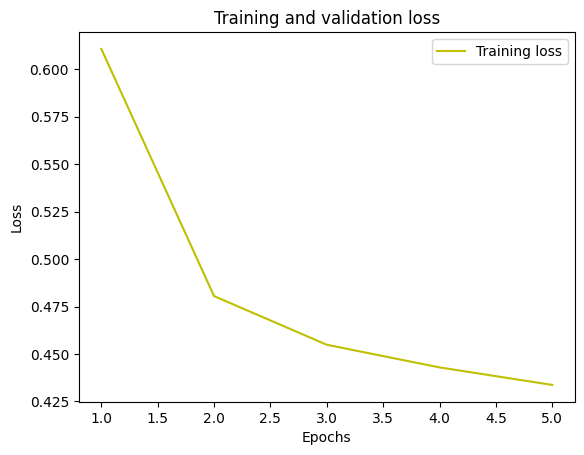

In [14]:
# cf. model.fit()Ïù¥ Î¶¨ÌÑ¥ÌïòÎäî Í∞ùÏ≤¥Ïóê Îã¥Í∏¥ Ï†ïÎ≥¥Î°ú Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ - loss
import matplotlib.pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss'] # validation ÏÑ§Ï†ï ÏïàÌñàÏúºÎØÄÎ°ú ÏÇ¨Ïö©x
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss') # ÏúÑ commentÏôÄ ÎèôÏùº
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

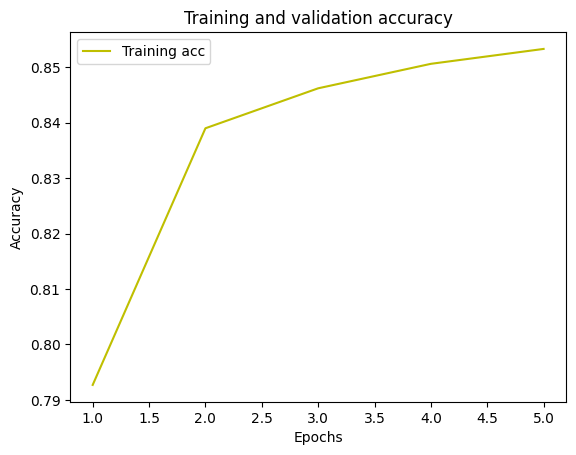

In [15]:
# cf. model.fit()Ïù¥ Î¶¨ÌÑ¥ÌïòÎäî Í∞ùÏ≤¥Ïóê Îã¥Í∏¥ Ï†ïÎ≥¥Î°ú Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ - accuracy
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy'] # validation ÏÑ§Ï†ï ÏïàÌñàÏúºÎØÄÎ°ú ÏÇ¨Ïö©x
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc') # ÏúÑ commentÏôÄ ÎèôÏùº
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# Evaluate the train_val
# Í∏∞Î≥∏Ï†ÅÏúºÎ°ú model.compile()ÏóêÏÑú ÏßÄÏ†ïÌñàÎçò ÌèâÍ∞Ä ÏßÄÌëúÎì§ÏùÑ Î¶¨ÌÑ¥Ìï®
model1.evaluate(X_val, y_val,
               verbose=2,
               return_dict=True)

375/375 - 1s - 2ms/step - accuracy: 0.8417 - loss: 0.4593


{'accuracy': 0.8416666388511658, 'loss': 0.45934244990348816}

**cf. `model.evaluate()`**  
references. [tf.keras.Model.evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [17]:
# Îçî ÏûêÏÑ∏Ìïú Í≤∞Í≥º ÌôïÏù∏
# model.compile()ÏóêÏÑú 'metrics'Î•º Ïù¥Ïö©Ìï¥ÏÑúÎèÑ ÌôïÏù∏ Í∞ÄÎä•Ìï† Í≤É Í∞ôÏßÄÎßå,
# ÏùºÎã® Î∞∞Ïö¥ÎåÄÎ°úÎßå ÏßÑÌñâÌï®

from sklearn.metrics import classification_report, confusion_matrix

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

y_pred = model1(X_val)
y_pred_probs = softmax(y_pred)
y_pred_class = np.argmax(y_pred_probs, axis=1)
y_val_class = y_val # one-hot encoding Ïïà Ìï¥ÏÑú Ïù¥Î†áÍ≤å ÏÇ¨Ïö©
# ÎßåÏïΩ ÌñàÎã§Î©¥, Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌñàÏùÑ Í±∞ÏûÑ
# y_val_class = np.argmax(y_val, axis=1)

print(classification_report(y_val_class, y_pred_class,
                            zero_division=0))
print(confusion_matrix(y_val_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1200
           1       0.97      0.96      0.97      1200
           2       0.77      0.68      0.72      1200
           3       0.89      0.84      0.86      1200
           4       0.61      0.90      0.73      1200
           5       0.93      0.96      0.94      1200
           6       0.73      0.42      0.53      1200
           7       0.94      0.91      0.93      1200
           8       0.95      0.96      0.96      1200
           9       0.95      0.95      0.95      1200

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.84     12000
weighted avg       0.85      0.85      0.84     12000

[[1062    6   16   35   13    1   53    0   14    0]
 [   4 1155    6   24    7    1    3    0    0    0]
 [  21    2  820   10  277    0   64    0    5    1]
 [  53   19   18 1008   76    0   22    0    4    0]
 [   2    0   57   27 1078   

In [18]:
# cf.
print(y_pred, end='\n\n\n')
print(y_pred_probs, end='\n\n\n')
print(y_pred_class, end='\n\n\n')
print(y_val_class)

tf.Tensor(
[[1.60384334e-05 2.37586573e-06 6.10236311e-05 ... 1.33775651e-01
  2.13197935e-02 2.14219809e-01]
 [1.24550925e-03 7.37591563e-06 2.58330884e-03 ... 1.27847274e-17
  1.06712156e-04 2.14334129e-19]
 [8.80085449e-10 1.15021703e-09 3.42990241e-08 ... 2.33949292e-02
  4.86990350e-04 1.95877533e-03]
 ...
 [3.50901155e-06 5.97604412e-07 2.90279568e-04 ... 5.51888292e-11
  9.97308254e-01 9.66114341e-11]
 [6.23241474e-04 1.62249162e-05 9.90201294e-01 ... 9.08341446e-15
  1.40880977e-04 1.70691355e-13]
 [5.13346240e-05 2.00800378e-06 2.71983245e-05 ... 1.02983631e-05
  9.99400020e-01 6.76193895e-06]], shape=(12000, 10), dtype=float32)


[[7.0980241e-05 7.1376948e-05 7.3984978e-05 ... 8.2810904e-05
  7.2807983e-05 8.8561705e-05]
 [7.1067567e-05 7.1377304e-05 7.4171832e-05 ... 7.2441842e-05
  7.1279756e-05 7.1484435e-05]
 [7.0979106e-05 7.1376773e-05 7.3980467e-05 ... 7.4156596e-05
  7.1306866e-05 7.1624592e-05]
 ...
 [7.0979353e-05 7.1376817e-05 7.4001939e-05 ... 7.2441842e-05
  1.93

In [19]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              ÏùºÎ∞òÏ†ÅÏúºÎ°ú precisionÍ≥º recallÏùÄ trade-off Í¥ÄÍ≥ÑÎùºÏÑú Ïù¥Î•º Ï†àÏ∂©Ìï† Ïàò ÏûàÎèÑÎ°ù Ìïú Í∞úÎÖêÏûÑ
support     | Í∞Å classÏùò sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(Í∞Å classÎì§Ïùò precision ÌèâÍ∑†)
'''

'cf.\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\n              ÏùºÎ∞òÏ†ÅÏúºÎ°ú precisionÍ≥º recallÏùÄ trade-off Í¥ÄÍ≥ÑÎùºÏÑú Ïù¥Î•º Ï†àÏ∂©Ìï† Ïàò ÏûàÎèÑÎ°ù Ìïú Í∞úÎÖêÏûÑ\nsupport     | Í∞Å classÏùò sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(Í∞Å classÎì§Ïùò precision ÌèâÍ∑†)\n'

In [20]:
'''cf.
TN  | True Negative(ÏßÑÏùåÏÑ±)
FN  | False Negative(ÏúÑÏùåÏÑ±)
FP  | False Positive(ÏúÑÏñëÏÑ±)
TP  | True Positive(ÏßÑÏñëÏÑ±)
'''

'cf.\nTN  | True Negative(ÏßÑÏùåÏÑ±)\nFN  | False Negative(ÏúÑÏùåÏÑ±)\nFP  | False Positive(ÏúÑÏñëÏÑ±)\nTP  | True Positive(ÏßÑÏñëÏÑ±)\n'

* * *
* * *
ÏïûÏÑ† model networkÎäî input layer(784,)ÏôÄ output layer(10,)Îßå ÏûàÏóàÎã§.  
Ïù¥Î≤àÏóêÎäî Ïó¨Í∏∞Ïóê hidden layerÎ•º ÌïòÎÇò Ï∂îÍ∞ÄÌï¥ÏÑú **$^{1)}$Multi-layer Perceptron**ÏùÑ Íµ¨ÌòÑÌïúÎã§.  
$^{1)}$cf. [Topic/What is Perceptron.md](https://github.com/rudevico/Gachon-AISTUDY/blob/main/Topic/What%20is%20Perceptron.md)

In [21]:
# cf. ÌòÑÏû¨ÍπåÏßÄÏùò X, y Î™©Î°ù
# X_train, X_val, X_test, y_train, y_val, y_test

In [22]:
# hidden layer
dense1 = keras.layers.Dense(units=100,
                            activation='sigmoid',
                            input_shape=(28*28,),
                            name='hidden_layer_1')
# output layer
dense2 = keras.layers.Dense(units=10,
                            activation='softmax',
                            name='output_layer')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model = keras.models.Sequential(name='Multi-layer-Perceptron')
model.add(dense1)
model.add(dense2)

model.summary()

# hidden_layer_1Ïùò Param # = 784*100(weights) + 1*100(biases)
# output_layerÏùò Param # = 100*10(weights) + 1*10(biases)

Model: "Multi-layer-Perceptron"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ hidden_layer_1 (Dense)               ‚îÇ (None, 100)                 ‚îÇ          78,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ output_layer (Dense)                 ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# cf. modelÏóê layerÎ•º Ï∂îÍ∞ÄÌïòÎäî Îòê Îã§Î•∏ Î∞©Î≤ï
# Ìï¥Îãπ Î∞©Î≤ïÏù¥ Ï°∞Í∏à Îçî modelÏùÑ dynamicÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå
model2 = keras.models.Sequential(name='Multi-layer_Perceptron')
model2.add(keras.layers.Dense(units=100,
                            activation='sigmoid',
                            input_shape=(28*28,),
                            name='hidden_layer_1'))
model2.add(keras.layers.Dense(units=10,
                            activation='softmax',
                            name='output_layer_1'))

model2.summary()

Model: "Multi-layer_Perceptron"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ hidden_layer_1 (Dense)               ‚îÇ (None, 100)                 ‚îÇ          78,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ output_layer_1 (Dense)               ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model2.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=train_epochs, verbose=2)

Epoch 1/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8034 - loss: 0.5759
Epoch 2/5
1500/1500 - 2s - 2ms/step - accuracy: 0.8496 - loss: 0.4156
Epoch 3/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8617 - loss: 0.3804
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8719 - loss: 0.3564
Epoch 5/5
1500/1500 - 2s - 1ms/step - accuracy: 0.8762 - loss: 0.3392


In [26]:
model2.evaluate(X_val, y_val,
               verbose=2,
               return_dict=True)

375/375 - 1s - 2ms/step - accuracy: 0.8720 - loss: 0.3509


{'accuracy': 0.871999979019165, 'loss': 0.350943922996521}

* * *
* hidden layerÏùò activation functionÏùÑ sigmoid ‚Üí ReLUÎ°ú Î∞îÍøîÎ≥∏Îã§.  
    **cf. [why is ReLU used as an activation function](https://www.geeksforgeeks.org/why-is-relu-used-as-an-activation-function/)**
* ÎòêÌïú `.reshape()`Î°ú (28, 28)ÏùÑ (28*28,)ÏúºÎ°ú Î∞îÍøîÏÑú inputÏóê ÎÑ£ÏóàÏóàÎäîÎç∞,  
(28, 28) Í∑∏ÎåÄÎ°ú ÎÑ£Í≥† `flatten()`ÏùÑ ÏÇ¨Ïö©ÌïúÎã§.



In [27]:
model3 = keras.models.Sequential(name='Multi-layer_Perceptron_flatten-x_ReLU')
# Flatten layerÎ•º ÏßëÏ§ëÏ†ÅÏúºÎ°ú Î≥º Í≤É
model3.add(keras.layers.Flatten(input_shape=(28, 28),
                                name='flatten_layer'))
model3.add(keras.layers.Dense(units=100,
                             activation='relu',
                             name='hidden_layer'))
model3.add(keras.layers.Dense(units=10,
                             activation='softmax',
                             name='output_layer'))

model3.summary()

# flatten_layerÎäî ÌïôÏäµÌïòÎäî layerÍ∞Ä ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê,
# Ìï¥Îãπ Neural NetworkÏùò depthÎäî 2ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§(hidden, output).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Multi-layer_Perceptron_flatten-x_ReLU"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten_layer (Flatten)              ‚îÇ (None, 784)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hidden_layer (Dense)                 ‚îÇ (None, 100)                 ‚îÇ          78,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ output_layer (Dense)                 ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# cf. model3ÏóêÎäî flatten_layerÍ∞Ä Ï°¥Ïû¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê,
# 28pixel * 28pixelÏùò 2-dim Îç∞Ïù¥ÌÑ∞Î•º 28*28Ïùò 1-dimÏúºÎ°ú ÎØ∏Î¶¨ Î≥ÄÌòïÌïòÏßÄ ÏïäÏïÑÎèÑ ÎêúÎã§.

(X_train, y_train), (X_test, y_test) = \
    keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0

In [29]:
model3.compile(loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
# Ïù¥Î≤àÏóêÎäî train_valÏùÑ Îî∞Î°ú ÎÇòÎàÑÏßÄ ÏïäÍ≥†, validation_split parameterÎ•º ÏÇ¨Ïö©
history = model3.fit(X_train, y_train,
                     validation_split=0.2,
                     verbose=2,
                     epochs=train_epochs)

Epoch 1/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8141 - loss: 0.5290 - val_accuracy: 0.8428 - val_loss: 0.4462
Epoch 2/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8609 - loss: 0.3897 - val_accuracy: 0.8634 - val_loss: 0.3805
Epoch 3/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8734 - loss: 0.3507 - val_accuracy: 0.8722 - val_loss: 0.3673
Epoch 4/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8807 - loss: 0.3324 - val_accuracy: 0.8838 - val_loss: 0.3454
Epoch 5/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8866 - loss: 0.3161 - val_accuracy: 0.8738 - val_loss: 0.3667


* * *
* optimizerÎ•º Î≥ÄÍ≤ΩÌï¥Î≥∏Îã§.  
    **cf. [tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)**  
    **cf. [tf.keras.optimizers.SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD?_gl=1*1bsob3k*_up*MQ..*_ga*MTAyNzI4OTg0MS4xNzIzMTA0Mzky*_ga_W0YLR4190T*MTcyMzEwNDM5Mi4xLjAuMTcyMzEwNDM5Mi4wLjAuMA..)**
* `sgd = keras.optimizers.SGD()`Î•º ÏàòÌñâÌïòÏßÄ ÏïäÏïÑÎèÑ `.compile()`ÏóêÏÑú 'sgd'Î•º ÏûêÎèôÏúºÎ°ú Ïù∏ÏãùÌï¥Ï£ºÍ∏∞Îäî ÌïúÎã§.

> Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Îã§ÏùåÍ≥º Í∞ôÏùÄ optimizerÎ•º Ï£ºÎ°ú ÏÇ¨Ïö©ÌïúÎã§.

* `keras.optimizers.SGD`: (normal) sgd, momentum, neserov momentum
* `keras.optimizers.Adagrad`
* `keras.optimizers.RMSprop`
* `keras.optimizers.Adam`

In [30]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # default = 0.01
model3.compile(optimizer='sgd', # default = 'RMSprop'
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [31]:
history = model3.fit(X_train, y_train,
                     validation_split=0.2,
                     verbose=2,
                     epochs=train_epochs)

Epoch 1/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9073 - loss: 0.2582 - val_accuracy: 0.8912 - val_loss: 0.3191
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9099 - loss: 0.2495 - val_accuracy: 0.8915 - val_loss: 0.3174
Epoch 3/5
1500/1500 - 3s - 2ms/step - accuracy: 0.9105 - loss: 0.2459 - val_accuracy: 0.8917 - val_loss: 0.3186
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9116 - loss: 0.2436 - val_accuracy: 0.8922 - val_loss: 0.3146
Epoch 5/5
1500/1500 - 2s - 2ms/step - accuracy: 0.9115 - loss: 0.2416 - val_accuracy: 0.8918 - val_loss: 0.3147


* * *

**cf0. sgd(normal sgd) Optimization:**  

**expression:**  
$ùù∑_{t+1} = ùù∑_t\ -\ Œ∑*g_t$  
* $g_t$ is loss functionÏùò gradient == $‚àá_ùù∑J(ùù∑_t)$
    - $‚àá_ùù∑$Îäî ùù∑Ïóê ÎåÄÌïú ÎØ∏Î∂ÑÏùÑ ÏùòÎØ∏Ìï®.
    - $J$Îäî loss functionÏùÑ ÏùòÎØ∏Ìï®.
* $Œ∑$ is learning rate
* $ùù∑_t$ is iteration tÎ≤à Ïß∏Ïùò parameter value
* $g_t$ is iteration tÎ≤à Ïß∏Ïùò loss function value
* $ùù∑_0$ is ÏûÑÏùòÏùò Ï¥àÍ∏∞ random parameter value

```python
# code example.
sgd_normal = keras.optimizers.SGD(learning_rate=0.01)
```
* * *

**cf1. enhanced sgd: Momentum Optimization**  
references. [Problems with Gradient Descent - Cornell edu.](https://optimization.cbe.cornell.edu/index.php?title=Momentum#Problems_with_Gradient_Descent)  

With gradient descent, a weight update at time *t* is given by the learning rate and gradient at that exact moment.  
This means that the previous steps are not considered when searching for the next iteration's solution.  
This results in two issues:  
1. Unlike convex functions, a non-convex cost function can haver many local minima's meaning the first local minima found is not guaranteed to be the global minima. At the local minima, the gradient of the cost function will be very small resulting in no weight updates.  
Because of this, gradient descent will get stuck and fail to find the globa optimal solution.
2. Gradient descent can be noisy with many oscillations which results int a larger number of iterations needed to reach convergence.

**expression:**  
$ùù∑_{t+1} = ùù∑_t\ -\ Œ∑*v_{t+1}$  
* $v_{t+1}$ = $Œ≤*v_t\ +\ (1-Œ≤)g_t$
* $Œ≤$ is momentum coefficient  
Ï£ºÎ°ú 1Ïóê Í∞ÄÍπåÏö¥ Í∞í.

```python
# code example.
# 'momentum'ÏùÑ 0Î≥¥Îã§ ÌÅ¨Í≤å ÏÑ§Ï†ï(default 0), nesterovÎäî False(default)
# 'momentum'ÏùÄ Ï£ºÎ°ú 1Ïóê Í∞ÄÍπåÏö¥ Í∞íÏùÑ ÏßÄÏ†ï
sgd_momentum = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
```
* * *

**cf2. enhanced sgd: Nesterov Momentum Optimization**  

**expression:**  
~~ÏÉùÎûµ~~

```python
# code example.
# 'momentum'ÏùÑ 0Î≥¥Îã§ ÌÅ¨Í≤å ÏÑ§Ï†ïÌïòÍ≥†, 'nesterov'Î•º TrueÎ°ú ÏÑ§Ï†ï.
sgd_nestrov = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
```

* * *

References. [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)  

dropoutÏùÑ ÌÜµÌï¥ overfittingÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÎã§.  
> The Dropout layer **randomly sets input units to 0** with a frequency of rate at each step during training time, which **helps prevent overfitting**.

In [32]:
# dropout layer Ï∂îÍ∞Ä
# Ï∂îÍ∞Ä ÏúÑÏπòÎäî Í∏∞Ï°¥Ïùò hidden_layer Îã§Ïùå
# cf. modelÏùÑ Ï≤òÏùåÎ∂ÄÌÑ∞ Ïû¨Ï†ïÏùòÌïòÏßÄ ÏïäÍ≥† dynamicÌïòÍ≤å Ìï† Ïàò ÏûàÎäî Î∞©Î≤ïÏù¥ ÏûàÏßÄÎßå,
# Îã§ÏùåÏóê Îã§Î£∞ ÏòàÏ†ï
model5 = keras.models.Sequential(name='Multi-layer_Perceptron_flatten-x_ReLU_droptout_updated')
model5.add(keras.layers.Flatten(input_shape=(28, 28),
                                name='flatten_layer'))
model5.add(keras.layers.Dense(units=100,
                             activation='relu',
                             name='hidden_layer'))
# Ïù¥Ï†Ñ layerÏùò node Ï§ë 0.3 ÎπÑÏú® ÎßåÌÅºÏùò nodeÎ•º dropout
model5.add(keras.layers.Dropout(rate=0.3,
                                name='dropout_layer'))
model5.add(keras.layers.Dense(units=10,
                             activation='softmax',
                             name='output_layer'))

model5.summary()

Model: "Multi-layer_Perceptron_flatten-x_ReLU_droptout_updated"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten_layer (Flatten)              ‚îÇ (None, 784)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hidden_layer (Dense)                 ‚îÇ (None, 100)                 ‚îÇ          78,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_layer (Dropout)              ‚îÇ (None, 100)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ output_layer (Dense)                 ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
adam = keras.optimizers.Adam()
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model5.fit(X_train, y_train,
                     validation_split=0.2,
                     epochs=train_epochs,
                     verbose=2)

Epoch 1/5
1500/1500 - 6s - 4ms/step - accuracy: 0.7920 - loss: 0.5881 - val_accuracy: 0.8453 - val_loss: 0.4304
Epoch 2/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8431 - loss: 0.4326 - val_accuracy: 0.8568 - val_loss: 0.3986
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8558 - loss: 0.4003 - val_accuracy: 0.8653 - val_loss: 0.3618
Epoch 4/5
1500/1500 - 3s - 2ms/step - accuracy: 0.8603 - loss: 0.3800 - val_accuracy: 0.8696 - val_loss: 0.3556
Epoch 5/5
1500/1500 - 4s - 2ms/step - accuracy: 0.8659 - loss: 0.3631 - val_accuracy: 0.8763 - val_loss: 0.3439


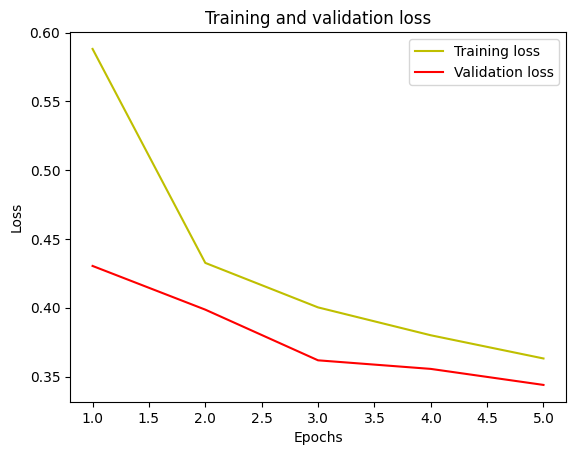

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss'] # validation ÏÑ§Ï†ï ÏïàÌñàÏúºÎØÄÎ°ú ÏÇ¨Ïö©x
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss') # ÏúÑ commentÏôÄ ÎèôÏùº
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Validation lossÍ∞Ä Îçî ÎÇÆÏúºÎØÄÎ°ú overfittingÏù¥ÏßÄÎßå,
# Îã®Ïàú Ïã§ÏäµÏù¥ÎØÄÎ°ú Ïù¥Î•º Í∞úÏÑ†ÌïòÏßÄÎäî ÏïäÍ≤†Ïùå

Ï∂îÍ∞ÄÎ°ú Ìï† Í≤É: model save and load, callback, early stopping